In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.optimize import minimize 
from numpy.linalg import inv

EJERCICIO 4

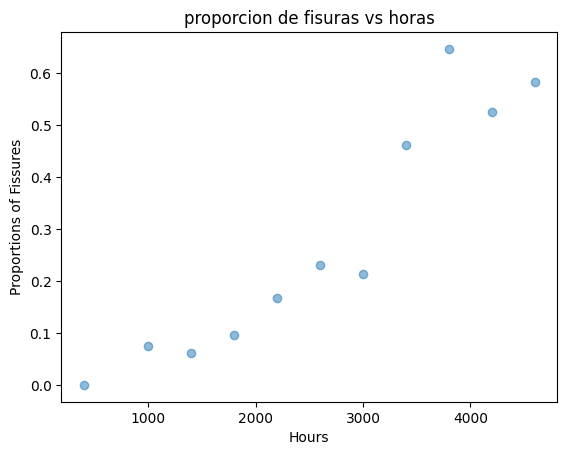

In [26]:
df = pd.read_csv("C:/Users/Usuario/Estadistica/Estadistica-Inferencia/turbines.csv")

df.columns

plt.scatter(df['Hours'],df['Proportions of Fissures'], alpha=0.5)
plt.xlabel('Hours')
plt.ylabel('Proportions of Fissures')
plt.title('proporcion de fisuras vs horas')
plt.show()

Una GLM binomial puede ser un modelo razonable porque se busca una proporcion de exitos (fisuras). Una distribucion binomial permite la proporcion de casos positivos sobre un total de casos, siendo estos independiendtes como en este caso.
Propongo el link canonico donde eta = logit(mu)

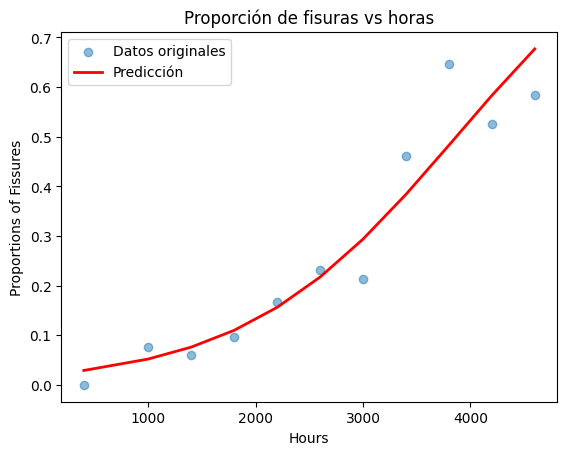

se(b0) = 15.232651268546642
se(b1) = 0.004139630837976499


In [28]:
def neg_log_likelihood_binomial(beta, X, Y):
    eta  = np.dot(X, beta) 
    return -np.sum(Y * eta  - np.log(1 + np.exp(eta))) 

X = np.column_stack((np.ones(df['Hours'].values.shape), df['Hours'].values)) #armo la matrix de diseño, con la columan de 1 para el intercepto 

initial_beta = np.zeros(X.shape[1])
res_binomial = minimize(neg_log_likelihood_binomial, initial_beta, args=(X, df['Proportions of Fissures'].values)) #minimizo la -log(likelihood) ya quew es lo mismo que maximizar la likelihood

#lo hago porque quiero maximizar la propapilidad de que se observen los valores que estoy usando para estimar

b0 = res_binomial.x[0]
b1 = res_binomial.x[1]
#tengo lso betas

predictions = 1 / (1 + np.exp(-X@res_binomial.x))

plt.scatter(df['Hours'], df['Proportions of Fissures'], alpha=0.5, label='Datos originales')
plt.plot(df['Hours'], predictions, color='red', label='Predicción', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('Proportions of Fissures')
plt.title('Proporción de fisuras vs horas')
plt.legend()
plt.show()

#para calcular el error uso la matriz de fisher
mu = np.exp(X@res_binomial.x) / (np.exp(X@res_binomial.x) + 1) # es la esperanza
W = np.diag(mu) 
I = (1 / 50) * (X.T @ W @ X) #agrego el fi que se obtiene de la binomial como EDM (uso 50 por la consigna)
cov_matrix = inv(I)

se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])

print("se(b0) =",se_b0)
print("se(b1) =",se_b1)